
## Feature Extraction In NLP

Need of feature extraction techniques Machine Learning algorithms learn from a pre-defined
set of features from the training data to produce output for the test data. But the main problem
in working with language processing is that machine learning algorithms cannot work on the raw text directly.
So, we need some feature extraction techniques to convert text into a matrix(or vector) of features. Some of the
most popular methods of feature extraction are :

- N-Gram, Bi-Gram etc
- Bag of Words (BoW)
- Term Frequency Calculation TF
- Inverse Document Frequency IDF
- TFIDF Term Frequency - Inverse Document Frequency
- Text Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load Spam Dataset

In [1]:
# Load the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/qunatiphi_NLP/Spam Text Classification/spam.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
# Check for null rows
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
#Check the shape of DataFrame
df.shape

(5572, 4)

In [6]:
#target class value_counts
df['label'].value_counts()


ham     4825
spam     747
Name: label, dtype: int64

# Balance Dataset
-  As we can see we have the unbalance dataset we need to balance it first.

In [7]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [8]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [9]:
# Check the shape of ham and spam
ham.shape,spam.shape

((4825, 4), (747, 4))

In [10]:
ham=ham.sample(spam.shape[0])
ham.shape,spam.shape

((747, 4), (747, 4))

In [11]:
#merge balance dataset
data=ham.append(spam,ignore_index=True)

<ipython-input-11-bbcb14e4052b>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=ham.append(spam,ignore_index=True)


In [12]:
data.head(5)

,label,message,length,punct
0,ham,I surely dont forgot to come:)i will always be...,70,5
1,ham,Yar lor wait 4 my mum 2 finish sch then have l...,134,9
2,ham,I'm aight. Wat's happening on your side.,40,4
3,ham,He neva grumble but i sad lor... Hee... Buy tm...,148,10
4,ham,I realise you are a busy guy and i'm trying no...,143,3


In [15]:
#shuffle the dataset
data=data.sample(frac=1)
data.reset_index(inplace=True)
data.head()

,index,label,message,length,punct
0,743,ham,Gimme a few was &lt;#&gt; minutes ago,39,5
1,544,ham,Yup i'm still having coffee wif my frens... My...,82,8
2,1472,spam,You have 1 new message. Call 0207-083-6089,42,3
3,886,spam,U have a Secret Admirer who is looking 2 make ...,143,5
4,1266,spam,Your 2004 account for 07XXXXXXXXX shows 786 un...,128,4


In [17]:
data.drop(columns='index',inplace=True)

In [18]:
data.head()

,label,message,length,punct
0,ham,Gimme a few was &lt;#&gt; minutes ago,39,5
1,ham,Yup i'm still having coffee wif my frens... My...,82,8
2,spam,You have 1 new message. Call 0207-083-6089,42,3
3,spam,U have a Secret Admirer who is looking 2 make ...,143,5
4,spam,Your 2004 account for 07XXXXXXXXX shows 786 un...,128,4


In [19]:
data.shape

(1494, 4)

In [20]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

# Exploratory Data Analysis

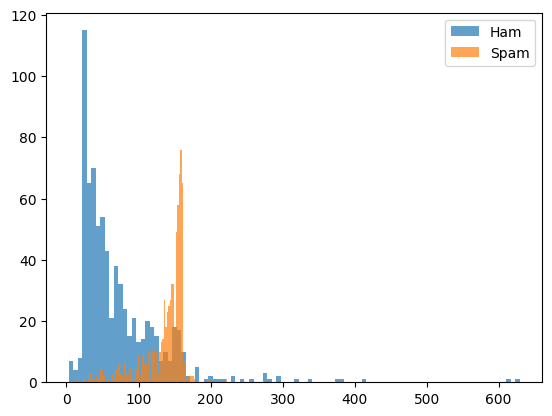

In [21]:
plt.hist(ham['length'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['length'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

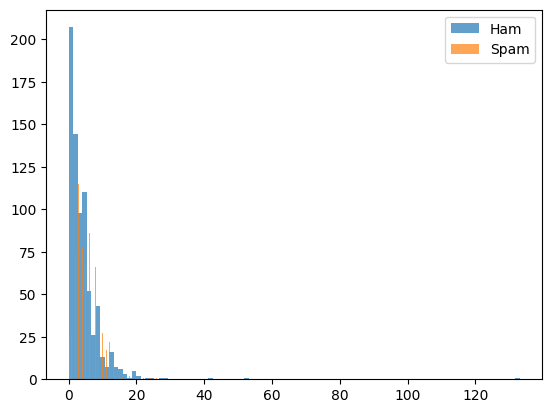

In [22]:
plt.hist(ham['punct'], bins = 100, alpha = 0.7, label='Ham')
plt.hist(spam['punct'], bins = 100, alpha = 0.7, label = 'Spam')
plt.legend()
plt.show()

# Data Preparation for Training

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['message'])

In [26]:
X = X.toarray()

In [27]:
X.shape

(1494, 4601)

In [28]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
#Split the data in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size = 0.2, random_state = 0, stratify = data['label'])

In [32]:
X_train.shape, X_test.shape

((1195, 4601), (299, 4601))

# Train the Model
- RandomForestClassifier




In [33]:
clf = RandomForestClassifier(n_estimators=100, n_jobs= -1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

- SVC

In [34]:
clf_svc = SVC(C = 1000, gamma = 'auto')
clf_svc.fit(X_train, y_train)

SVC(C=1000, gamma='auto')

# Model Evaluation

- Random Forest

In [37]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.96      0.99      0.97       150
        spam       0.99      0.96      0.97       149

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299



- SVC

In [38]:
y_pred = clf_svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       150
        spam       1.00      0.99      0.99       149

    accuracy                           0.99       299
   macro avg       0.99      0.99      0.99       299
weighted avg       0.99      0.99      0.99       299



#Test Model with Real Data

In [39]:
def predict(x):
    x = tfidf.transform([x])
    x = x.toarray()
    pred = clf_svc.predict(x)
    return pred

In [40]:
predict('hey, whassup')

array(['ham'], dtype=object)

In [41]:
predict('you have got free tickets to the usa this summer')

array(['spam'], dtype=object)